In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
import os

folder_path = r"E:\ElevateLabs\7"
os.listdir(folder_path)

['breast-cancer.csv', 'task 7.pdf']

In [6]:
df = pd.read_csv(r"E:\ElevateLabs\7\breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Drop ID column if it exists
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Encode diagnosis (M = 1, B = 0)
df['target'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Drop original diagnosis column
df = df.drop(columns=['diagnosis'])

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

scaler = StandardScaler().fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

X_train_s.shape, X_test_s.shape


((426, 30), (143, 30))

In [9]:
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train_s, y_train)

y_pred_lin = linear_svm.predict(X_test_s)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_lin))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lin))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lin))


Linear SVM Accuracy: 0.958041958041958

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        90
           1       1.00      0.89      0.94        53

    accuracy                           0.96       143
   macro avg       0.97      0.94      0.95       143
weighted avg       0.96      0.96      0.96       143


Confusion Matrix:
 [[90  0]
 [ 6 47]]


In [10]:
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svm.fit(X_train_s, y_train)

y_pred_rbf = rbf_svm.predict(X_test_s)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.972027972027972

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143


Confusion Matrix:
 [[90  0]
 [ 4 49]]


In [11]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_linear = cross_val_score(linear_svm, X, y, cv=cv, scoring='accuracy')
cv_rbf = cross_val_score(rbf_svm, X, y, cv=cv, scoring='accuracy')

print("Linear SVM CV Scores:", cv_linear)
print("Linear SVM Mean:", cv_linear.mean())

print("\nRBF SVM CV Scores:", cv_rbf)
print("RBF SVM Mean:", cv_rbf.mean())


Linear SVM CV Scores: [0.94736842 0.92982456 0.95614035 0.93859649 0.96460177]
Linear SVM Mean: 0.9473063188945815

RBF SVM CV Scores: [0.93859649 0.87719298 0.89473684 0.93859649 0.92035398]
RBF SVM Mean: 0.9138953578636858


In [12]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale']
}

grid = GridSearchCV(
    SVC(kernel='rbf'),
    param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_s, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

best_rbf = grid.best_estimator_

y_pred_best = best_rbf.predict(X_test_s)
print("Best Model Test Accuracy:", accuracy_score(y_test, y_pred_best))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 10, 'gamma': 0.01}
Best CV Score: 0.976497948016416
Best Model Test Accuracy: 0.9790209790209791


In [13]:
# CELL A: Imports + load dataset
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, roc_curve, roc_auc_score,
                             precision_recall_curve, average_precision_score)

sns.set(style="whitegrid", context="notebook")

# === update this path if your file has a different name ===
file_path = r"E:\ElevateLabs\7\breast-cancer.csv"

# load
df = pd.read_csv(file_path)
print("Loaded file:", file_path)
print("Shape:", df.shape)
display(df.head())

# Basic preprocessing (same as earlier pipeline)
if 'id' in df.columns:
    df = df.drop(columns=['id'])
if 'diagnosis' in df.columns:
    df['target'] = df['diagnosis'].map({'M':1, 'B':0})
    df = df.drop(columns=['diagnosis'])
else:
    # if target already present assume column named 'target'
    if 'target' not in df.columns:
        raise KeyError("No 'diagnosis' or 'target' column found in CSV. Check the file.")

X = df.drop(columns=['target'])
y = df['target'].astype(int)

# train / test split and scaler (recreate the same split as earlier)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

print("Train/test shapes:", X_train_s.shape, X_test_s.shape)


Loaded file: E:\ElevateLabs\7\breast-cancer.csv
Shape: (569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Train/test shapes: (426, 30) (143, 30)


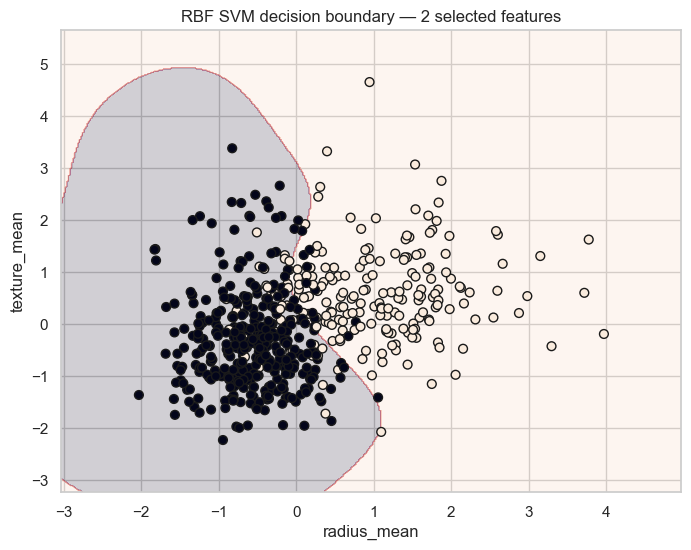

Accuracy on 2-feature test set: 0.9090909090909091


In [14]:
# CELL B: Decision boundary 2-feature plot
# Choose two features present in the dataset:
feat1 = 'radius_mean'
feat2 = 'texture_mean'

if feat1 not in X.columns or feat2 not in X.columns:
    print("Available columns (first 10):", X.columns.tolist()[:10])
    raise KeyError(f"One of the chosen features ({feat1}, {feat2}) not found. Change names accordingly.")

# Prepare 2D data and scale
X2 = df[[feat1, feat2]].values
y2 = df['target'].values
sc2 = StandardScaler().fit(X2)
X2_s = sc2.transform(X2)

# split for plotting/training
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_s, y2, test_size=0.25, stratify=y2, random_state=42)

# train an RBF SVM on these two features
svc2 = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svc2.fit(X2_train, y2_train)

# mesh for decision boundary
xx = np.linspace(X2_s[:,0].min()-1, X2_s[:,0].max()+1, 400)
yy = np.linspace(X2_s[:,1].min()-1, X2_s[:,1].max()+1, 400)
XX, YY = np.meshgrid(xx, yy)
grid = np.c_[XX.ravel(), YY.ravel()]
Z = svc2.predict(grid).reshape(XX.shape)

plt.figure(figsize=(8,6))
plt.contourf(XX, YY, Z, alpha=0.2)
plt.scatter(X2_s[:,0], X2_s[:,1], c=y2, edgecolor='k', s=40)
plt.xlabel(feat1); plt.ylabel(feat2)
plt.title("RBF SVM decision boundary — 2 selected features")
plt.show()

# Print test accuracy on those 2 features
print("Accuracy on 2-feature test set:", accuracy_score(y2_test, svc2.predict(X2_test)))


Explained variance ratio (2 PCs): 0.629


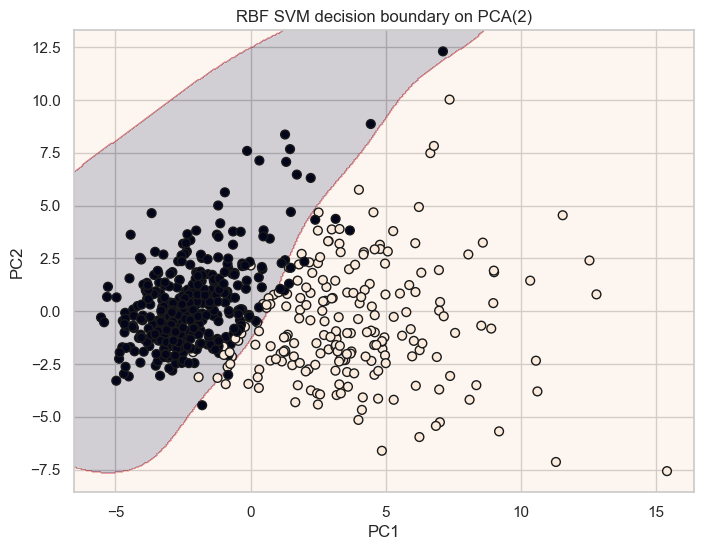

Accuracy on PCA test set: 0.9440559440559441


In [15]:
# CELL C: PCA 2D decision boundary (keeps max variance)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(scaler.transform(X))  # use same scaler fitted earlier
print("Explained variance ratio (2 PCs):", pca.explained_variance_ratio_.sum().round(3))

# split and train SVM on PCA 2 components
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_pca, y, test_size=0.25, stratify=y, random_state=42)
svc_pca = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svc_pca.fit(Xp_train, yp_train)

# mesh and predict
xx = np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 400)
yy = np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 400)
XX, YY = np.meshgrid(xx, yy)
grid = np.c_[XX.ravel(), YY.ravel()]
Z = svc_pca.predict(grid).reshape(XX.shape)

plt.figure(figsize=(8,6))
plt.contourf(XX, YY, Z, alpha=0.2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, edgecolor='k', s=40)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("RBF SVM decision boundary on PCA(2)")
plt.show()

print("Accuracy on PCA test set:", accuracy_score(yp_test, svc_pca.predict(Xp_test)))


Using existing best_rbf from notebook.


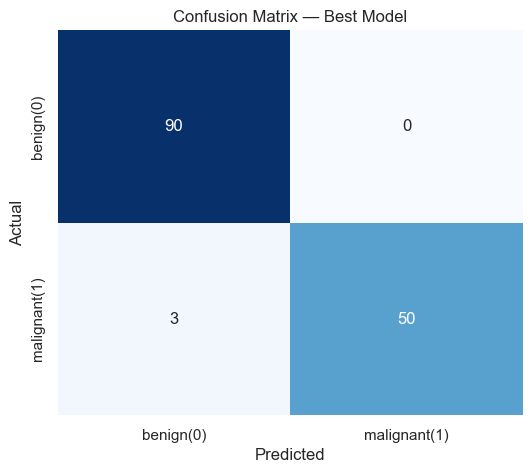

Test accuracy: 0.9790209790209791
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [16]:
# CELL D: Confusion matrix heatmap
# Try to reuse previously grid-searched best_rbf if present, else train a strong RBF on full features.
try:
    best_model = best_rbf  # if you ran GridSearch earlier
    print("Using existing best_rbf from notebook.")
except NameError:
    print("best_rbf not found — training a default RBF model on full features now.")
    best_model = SVC(kernel='rbf', C=10, gamma=0.01, probability=True, random_state=42)
    best_model.fit(X_train_s, y_train)

y_pred = best_model.predict(X_test_s)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['benign(0)','malignant(1)'],
            yticklabels=['benign(0)','malignant(1)'])
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.title("Confusion Matrix — Best Model")
plt.show()

print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


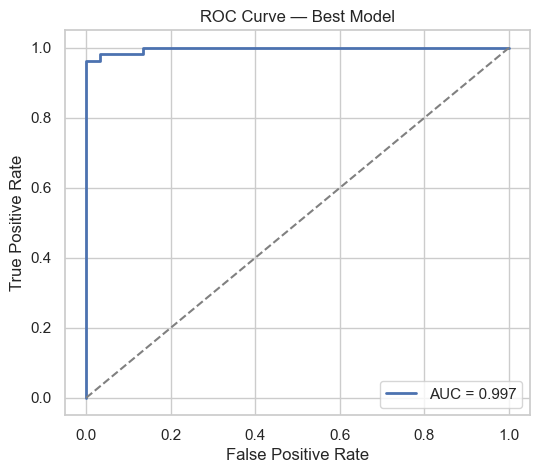

AUC: 0.9968553459119497


In [17]:
# CELL E: ROC curve and AUC
# Ensure we have probabilities or decision_function
model = best_model  # from previous cell

# For SVC, decision_function works well
if hasattr(model, "decision_function"):
    scores = model.decision_function(X_test_s)
else:
    scores = model.predict_proba(X_test_s)[:,1]

fpr, tpr, _ = roc_curve(y_test, scores)
auc = roc_auc_score(y_test, scores)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, label=f'AUC = {auc:.3f}')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Best Model')
plt.legend(loc='lower right')
plt.show()

print("AUC:", auc)


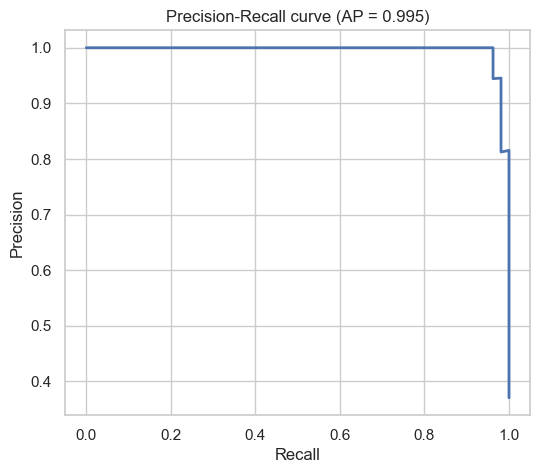

Average precision (AP): 0.995487531336588


In [18]:
# CELL F: Precision-Recall curve and Average Precision
if hasattr(model, "decision_function"):
    prob_or_score = model.decision_function(X_test_s)
else:
    prob_or_score = model.predict_proba(X_test_s)[:,1]

precision, recall, _ = precision_recall_curve(y_test, prob_or_score)
ap = average_precision_score(y_test, prob_or_score)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, lw=2)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AP = {ap:.3f})')
plt.grid(True)
plt.show()

print("Average precision (AP):", ap)


Number of support vectors per class: [26 25]
Support vectors shape: (51, 30)


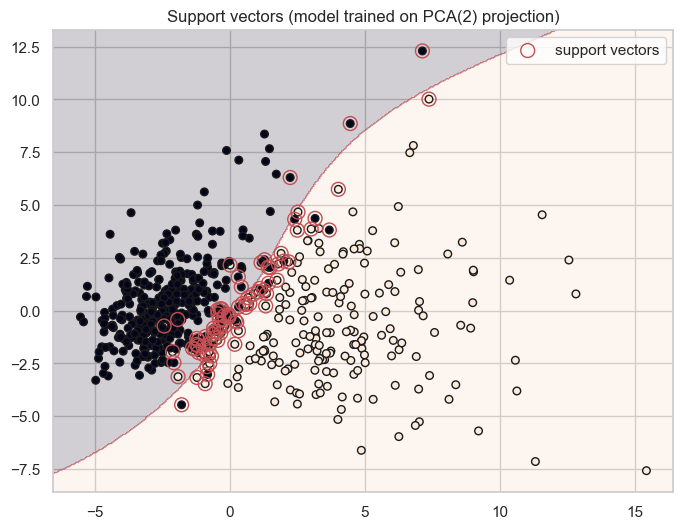

In [19]:
# CELL G: Support vector info + visualization on PCA(2)
if not hasattr(model, "support_"):
    print("Model does not have support_ attribute; cannot display support vectors.")
else:
    print("Number of support vectors per class:", model.n_support_)
    sv = model.support_vectors_
    print("Support vectors shape:", sv.shape)

    # visualize support vectors projected to PCA(2)
    if sv.shape[1] != 2:
        # project to PCA(2) space
        pca2 = PCA(n_components=2, random_state=42)
        X_all_scaled = scaler.transform(X)  # scaled full features
        X_pca_all = pca2.fit_transform(X_all_scaled)
        # find support indices in scaled space: need to map support_vectors_ to X_pca coords approx.
        # Simpler: plot model's decision boundary in PCA space (retrain on PCA if needed)
        svc_pca2 = SVC(kernel='rbf', C=10, gamma=0.01, probability=True, random_state=42)
        Xp = pca2.fit_transform(X_all_scaled)
        svc_pca2.fit(Xp, y)
        xx = np.linspace(Xp[:,0].min()-1, Xp[:,0].max()+1, 400)
        yy = np.linspace(Xp[:,1].min()-1, Xp[:,1].max()+1, 400)
        XX, YY = np.meshgrid(xx, yy)
        grid = np.c_[XX.ravel(), YY.ravel()]
        Z = svc_pca2.predict(grid).reshape(XX.shape)

        plt.figure(figsize=(8,6))
        plt.contourf(XX, YY, Z, alpha=0.2)
        plt.scatter(Xp[:,0], Xp[:,1], c=y, edgecolor='k', s=30)
        # plot support vectors of svc_pca2
        sv_pca = svc_pca2.support_vectors_
        plt.scatter(sv_pca[:,0], sv_pca[:,1], facecolors='none', edgecolors='r', s=100, label='support vectors')
        plt.title("Support vectors (model trained on PCA(2) projection)")
        plt.legend()
        plt.show()
    else:
        # if support vectors already 2D, just plot
        plt.figure(figsize=(8,6))
        plt.scatter(sv[:,0], sv[:,1], edgecolor='k', s=40)
        plt.title("Support vectors (2D)")
        plt.show()
